# Project: Wrangling and Analyze Data

# Project: Wrangling and Analyze Data

In [2]:
# import the necessary libaries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
# read the dataset into the pandas data
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# shape of the dataframe
df.shape

(2356, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [7]:
# check for null values
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [8]:
# check for duplicates
df.duplicated().sum()

0

In [9]:
# check for datatype
df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [10]:
# check for value counts of 'tweet_id'
df.tweet_id.value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388994772213

In [11]:
df.tweet_id.duplicated().sum()

0

In [12]:
df.timestamp.value_counts()

2017-06-06 00:01:46 +0000    1
2017-05-30 16:49:31 +0000    1
2015-12-07 23:33:58 +0000    1
2016-03-01 01:36:14 +0000    1
2015-11-26 18:16:16 +0000    1
2016-01-08 04:46:13 +0000    1
2017-02-24 21:54:03 +0000    1
2015-12-16 02:13:31 +0000    1
2016-10-12 02:53:11 +0000    1
2016-11-28 19:35:59 +0000    1
2016-06-27 16:08:30 +0000    1
2016-06-18 01:33:55 +0000    1
2017-07-17 16:17:36 +0000    1
2016-07-28 01:31:38 +0000    1
2015-12-13 01:25:37 +0000    1
2017-06-26 00:13:58 +0000    1
2016-02-16 20:28:06 +0000    1
2016-08-28 00:37:54 +0000    1
2016-02-12 04:07:53 +0000    1
2017-07-19 16:06:48 +0000    1
2016-06-16 18:26:48 +0000    1
2017-04-02 00:03:26 +0000    1
2016-05-26 01:47:51 +0000    1
2016-11-15 23:44:44 +0000    1
2016-07-12 01:52:49 +0000    1
2016-03-10 20:26:26 +0000    1
2015-12-21 03:12:08 +0000    1
2016-03-22 02:03:52 +0000    1
2017-05-12 17:12:53 +0000    1
2016-01-19 18:39:13 +0000    1
                            ..
2016-09-14 17:40:06 +0000    1
2015-11-

In [13]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Download the image_predictions dataset using Requests libary

In [14]:
# write out the request url of image_predictions
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open(os.path.join(url.split('/')[-1]), 'wb') as file:
    file.write(response.content)
    # read file into a csv
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')   

In [15]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
# check the number of rows and columns in the dataset
image_predictions.shape

(2075, 12)

In [17]:
# check for info
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
image_predictions.duplicated().sum()

0

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [21]:
consumer_key=W
consumer_secret=X
access_token=Y
access_secret=Z
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True)

In [22]:
# create lists for tweet
tweet_list = []
e_list = []
tweet_id = df['tweet_id']
# iterate over loop
for id in tweet_id:
    try:
        page = api.get_status(id, tweet_mode='extended')
        favorites = page['favorite_count']
        retweet_count = page['retweet_count']
        tweet_list.append({'tweet_id': int(id),
                          'favorites': int(favorites),
                          'retweet_count': int(retweet_count)})
 # define argument to the except statement       
    except Exception as e:
        print(str(id)+ " " + str(e))
        e_list.append(id)

888202515573088257 [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 [{'code': 144, 'message': 'No status found with that ID.'}]
856330835276025856 [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 [{'code': 144, 'message': 'No status found with that ID.'}]
851861385021730816 [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 [{'code': 144, 'message': 'No sta

In [23]:
tweet = pd.DataFrame(tweet_list, columns = ['tweet_id', 'favorites', 'retweet_count'])
tweet.to_csv('tweet_json.txt', encoding = 'utf-8')

In [24]:
print(len(tweet_list))

2326


In [25]:
print(len(e_list))

30


In [26]:
tweet.head(20)

,tweet_id,favorites,retweet_count
0,892420643555336193,33726,6979
1,892177421306343426,29256,5280
2,891815181378084864,21990,3466
3,891689557279858688,36820,7201
4,891327558926688256,35214,7723
5,891087950875897856,17760,2590
6,890971913173991426,10340,1649
7,890729181411237888,56705,15698
8,890609185150312448,24457,3605
9,890240255349198849,27874,6083


In [27]:
tweet.shape

(2326, 3)

In [28]:
tweet.describe()

,tweet_id,favorites,retweet_count
count,2.326000e+03,2326.000000,2326.000000
mean,7.417822e+17,7035.144884,2462.111350
std,6.822064e+16,10933.069335,4169.912945
min,6.660209e+17,0.000000,1.000000
25%,6.780814e+17,1218.750000,492.500000
50%,7.178159e+17,3040.500000,1145.500000
75%,7.986600e+17,8579.000000,2848.750000
max,8.924206e+17,144419.000000,70438.000000


In [29]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
tweet_id         2326 non-null int64
favorites        2326 non-null int64
retweet_count    2326 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


## Assessing Data


### Quality issues
1.Timestamp has an incorrect datatype.

2.Original tweets contains retweets.

3.Display full content of 'text' column.

4.Remove url from 'source' column.

5.Remove url from 'text' column.

6.Replace missing values in 'name' column.

7.Remove rows with missing values in 'expanded_urls'

8.Replace 'none' in the dog stages[puppo, pupper, doggo, floofer] column with NaN to indicate missing values.

### Tidiness issues
1.Dog stages should be in one column and not four.

2.Merge all three dataset into one master dataset.

## Cleaning Data

In [30]:
# Make copies of original pieces of data
df_clean = df.copy()
image_clean = image_predictions.copy()
tweet_clean = tweet.copy()

### Issue #1: incorrect datatype

#### Define: covert timestamp from object datatype to datetime.

#### Code

In [31]:
# convert timestamp to datetime
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)

#### Test

In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Issue #2: original tweets contains retweets.

#### Define: remove the retweets contained in the tweets with no images

#### Code

In [33]:
df_clean.drop(df_clean[df_clean.retweeted_status_id.notnull()].index, inplace = True)


In [34]:
# drop unnecessary columns
df_clean.drop(['in_reply_to_status_id',
                          'in_reply_to_user_id',
                          'retweeted_status_id',
                          'retweeted_status_user_id',
                          'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 220.9+ KB


### issue #3: content in text column are partially cut off.

#### Define: in order to gain accurate and clear insights at the end of the analysis, full contents of columns should be displayed.

#### Code

In [36]:
# display full text in the 'text' column
pd.set_option('display.max_colwidth', -1)

### Test

In [37]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### Issue #4: Url in 'text' column

#### Define: Remove the urls in the text column since its of no relevance to this analysis and to make work neat and clean.

### Code

In [38]:
df_clean['text'] = df_clean['text'].str.replace(r'\s*https?://\S+(\s+|$)', ' ').str.strip()

### Test

In [39]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### Issue 5: Url in 'source' column.

#### Define: replace the url with text as they are not necessary for this analysis and to make our codes clean and readable.

### Code

In [40]:
# remove url from source
df_clean.source=df_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iphone')   
df_clean.source=df_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene')                         
df_clean.source=df_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')                    
df_clean.source=df_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')    


### Test 

In [41]:
df_clean.source.value_counts()

Twitter for iphone     2042
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
Name: source, dtype: int64

### Issue 6: wrong and missing values in 'name' column.

### Define:  replace all the 'None' in the column with 'unknown'.

### Code

In [42]:
# replace all the 'None with unknown'
df_clean.name=df_clean.name.replace('None', 'unknown')
df_clean.name=df_clean.name.replace('a', 'unknown')
df_clean.name=df_clean.name.replace('quite', 'unknown')
df_clean.name=df_clean.name.replace('very', 'unknown')
df_clean.name=df_clean.name.replace('O', 'unknown')
df_clean.name=df_clean.name.replace('just', 'unknown')
df_clean.name=df_clean.name.replace('my', 'unknown')
df_clean.name=df_clean.name.replace('not', 'unknown')
df_clean.name=df_clean.name.replace('his', 'unknown')
df_clean.name=df_clean.name.replace('one', 'unknown')
df_clean.name=df_clean.name.replace('an', 'unknown')
df_clean.name=df_clean.name.replace('actually', 'unknown')
df_clean.name=df_clean.name.replace('getting', 'unknown')
df_clean.name=df_clean.name.replace('none', 'unknown')
df_clean.name=df_clean.name.replace('this', 'unknown')
df_clean.name=df_clean.name.replace('unacceptable', 'unknown')
df_clean.name=df_clean.name.replace('all', 'unknown')
df_clean.name=df_clean.name.replace('old', 'unknown')
df_clean.name=df_clean.name.replace('the', 'unknown')
df_clean.name=df_clean.name.replace('by', 'unknown')
df_clean.name=df_clean.name.replace('officially', 'unknown')
df_clean.name=df_clean.name.replace('none', 'unknown')


### Test

In [43]:
df_clean.name.value_counts()

unknown     778
Lucy        11 
Charlie     11 
Oliver      10 
Cooper      10 
Tucker      9  
Penny       9  
Sadie       8  
Lola        8  
Winston     8  
Toby        7  
Daisy       7  
Bo          6  
Stanley     6  
Oscar       6  
Jax         6  
Koda        6  
Bailey      6  
Bella       6  
Leo         5  
Rusty       5  
Chester     5  
Dave        5  
Milo        5  
Buddy       5  
Louis       5  
Bentley     5  
Scout       5  
Scooter     4  
Gary        4  
           ..  
Lambeau     1  
Stella      1  
Ed          1  
Brutus      1  
Tebow       1  
Callie      1  
Shaggy      1  
Juckson     1  
Chadrick    1  
Blanket     1  
Sailor      1  
Napolean    1  
Swagger     1  
Pinot       1  
Sweets      1  
Zooey       1  
Gromit      1  
Gunner      1  
Oddie       1  
Leela       1  
Lupe        1  
Jazz        1  
Godzilla    1  
Doobert     1  
Dawn        1  
Emma        1  
Huxley      1  
Jomathan    1  
Brandy      1  
Bowie       1  
Name: name, Length: 937,

### Issue #7: some rows in 'expanded_urls' has some missing values

#### Define: drop the missing values in expanded_urls

### Code

In [44]:
# drop rows with missing values
df_clean = df_clean.dropna(subset=['expanded_urls'])

### Test

In [45]:
df_clean.expanded_urls.isnull().sum()

0

### Issue #8: Columns stating 'None' instead of 'NaN'

#### Define: replace the 'None' in the dog stages column with 'NaN' to avoid ambiguity and clarify that they are missing values.

### Code

In [46]:
df_clean.doggo=df_clean.doggo.replace('None', 'NaN')
df_clean.pupper=df_clean.doggo.replace('None', 'NaN')
df_clean.puppo=df_clean.doggo.replace('None', 'NaN')
df_clean.floofer=df_clean.doggo.replace('None', 'NaN')

### Test

In [47]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,NaN,NaN,NaN


### Make the four columns [doggo, floofer, pupper, puppo] into one column known as 'dog_stage' 

In [48]:
cols = ['doggo', 'floofer', 'pupper', 'puppo']
df_clean['dog_stage'] = df_clean[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [49]:
df_clean['dog_stage']=df_clean['dog_stage'].replace('NaN_NaN_NaN_NaN', 'NaN')

In [50]:
df_clean = df_clean.drop(cols, axis=1)

In [51]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN


### Merge the three dataset into one master dataset known as 'twitter_master.csv' using 'tweet_id'.

In [52]:
twitter_master = df_clean.merge(image_clean,on='tweet_id', how='inner')
twitter_master = twitter_master.merge(tweet,on='tweet_id', how='inner')

In [53]:
twitter_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,33726,6979
1,892177421306343426,2017-08-01 00:17:27,Twitter for iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,29256,5280
2,891815181378084864,2017-07-31 00:18:03,Twitter for iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,21990,3466
3,891689557279858688,2017-07-30 15:58:51,Twitter for iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,36820,7201
4,891327558926688256,2017-07-29 16:00:24,Twitter for iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,35214,7723


In [54]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 1984
Data columns (total 22 columns):
tweet_id              1985 non-null int64
timestamp             1985 non-null datetime64[ns]
source                1985 non-null object
text                  1985 non-null object
expanded_urls         1985 non-null object
rating_numerator      1985 non-null int64
rating_denominator    1985 non-null int64
name                  1985 non-null object
dog_stage             1985 non-null object
jpg_url               1985 non-null object
img_num               1985 non-null int64
p1                    1985 non-null object
p1_conf               1985 non-null float64
p1_dog                1985 non-null bool
p2                    1985 non-null object
p2_conf               1985 non-null float64
p2_dog                1985 non-null bool
p3                    1985 non-null object
p3_conf               1985 non-null float64
p3_dog                1985 non-null bool
favorites             1985 non-n

In [55]:
twitter_master.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorites,retweet_count
count,1.985000e+03,1985.000000,1985.000000,1985.000000,1985.000000,1.985000e+03,1.985000e+03,1985.000000,1985.000000
mean,7.355984e+17,12.283123,10.534509,1.203526,0.593524,1.344535e-01,6.034372e-02,7689.686146,2235.477582
std,6.742021e+16,41.591626,7.337208,0.561615,0.272011,1.006098e-01,5.093156e-02,11344.702500,4004.825594
min,6.660209e+17,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,66.000000,11.000000
25%,6.758209e+17,10.000000,10.000000,1.000000,0.362596,5.405530e-02,1.624560e-02,1628.000000,494.000000
50%,7.081494e+17,11.000000,10.000000,1.000000,0.587372,1.175080e-01,4.952370e-02,3449.000000,1076.000000
75%,7.873980e+17,12.000000,10.000000,1.000000,0.845256,1.948970e-01,9.168510e-02,9527.000000,2551.000000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,144419.000000,70438.000000


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. 94% of tweets generated from source were from IPhones.

2. Doggo appears to be recurring amongst the dog stage, asides from tghe fact that the dog stage predominantly contains missing values.

3. There is a positive correlation between favourite counts and retweet count

### Visualization

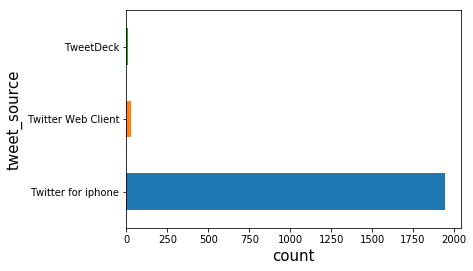

In [56]:
twitter_master.source.value_counts().plot(kind='barh');
plt.xlabel('count', fontsize=15)
plt.ylabel('tweet_source', fontsize=15)
plt.show;

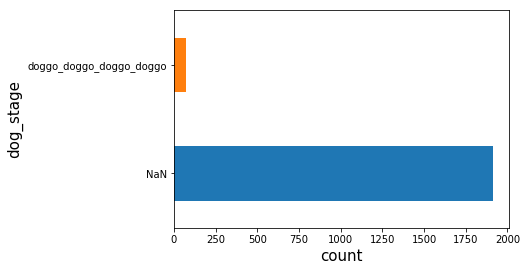

In [57]:
twitter_master.dog_stage.value_counts().plot(kind='barh')
plt.xlabel('count', fontsize=15)
plt.ylabel('dog_stage', fontsize=15)
plt.show;

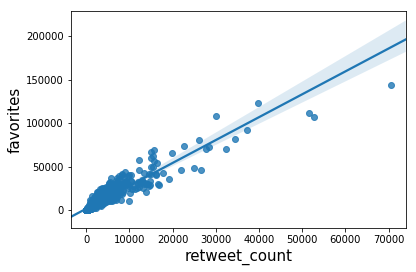

In [59]:
sb.regplot(x='retweet_count', y='favorites', data=twitter_master)
plt.xlabel('retweet_count', fontsize=15)
plt.ylabel('favorites', fontsize=15)
plt.show;

In [60]:
twitter_master.to_csv('twitter_archive_master', index=False)